In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('../data/raw_data.csv')

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24558 entries, 0 to 24557
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      24558 non-null  object 
 1   id                        24558 non-null  int64  
 2   url                       24558 non-null  object 
 3   twitterUrl                24558 non-null  object 
 4   text                      24558 non-null  object 
 5   source                    0 non-null      float64
 6   retweetCount              24558 non-null  int64  
 7   replyCount                24558 non-null  int64  
 8   likeCount                 24558 non-null  int64  
 9   quoteCount                24558 non-null  int64  
 10  viewCount                 24558 non-null  int64  
 11  createdAt                 24558 non-null  object 
 12  lang                      24558 non-null  object 
 13  bookmarkCount             24558 non-null  int64  
 14  isRepl

In [5]:
df.drop(columns=['type', 'url', 'twitterUrl', 'source', 'lang', 'bookmarkCount', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'isPinned', 'author', 'extendedEntities', 'card', 'place', 'entities', 'reply_to_user_results', 'quoted_tweet_results', 'quoted_tweet', 'retweeted_tweet', 'isConversationControlled', 'searchTermIndex', 'isQuote', 'inReplyToUsername'])

,id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,isReply,date,processed
0,1498772521948045312,El futuro ministro de hacienda de Boric Marcel...,1,0,2,0,0,2022-03-01 21:29:49+00:00,False,2022-03-01,True
1,1498715128686018561,🔴 Gremios de la salud en alerta por designació...,14,1,11,4,0,2022-03-01 17:41:46+00:00,False,2022-03-01,True
2,1498804396976742400,Schalper y rol de RN ante gobierno de Boric: L...,1,1,2,0,0,2022-03-01 23:36:29+00:00,False,2022-03-01,True
3,1498636115259047936,El independentismo estalla contra Borrell tras...,823,407,4273,155,0,2022-03-01 12:27:47+00:00,False,2022-03-01,True
4,1498806122995613696,Así esta el nivel de los amantes de Boric.\nEl...,11,11,37,1,0,2022-03-01 23:43:20+00:00,False,2022-03-01,True
...,...,...,...,...,...,...,...,...,...,...,...
24553,1914567024426078312,$hiloe La hipocresía #Boric en su máximo esple...,3,1,8,0,473,2025-04-22 06:28:44+00:00,False,NaN,True
24554,1914515389779681414,#ToleranciaCero | Carolina Tohá marca distanci...,21,62,98,5,9950,2025-04-22 03:03:33+00:00,False,NaN,True
24555,1914687099728495082,"🇨🇱🇧🇷 | LO ÚLTIMO: Presidente de Chile, Gabriel...",41,14,131,1,9297,2025-04-22 14:25:52+00:00,False,NaN,True
24556,1914686038242451557,"Lula recebe Gabriel Boric, presidente do Chile...",8,0,34,1,3538,2025-04-22 14:21:39+00:00,False,NaN,True


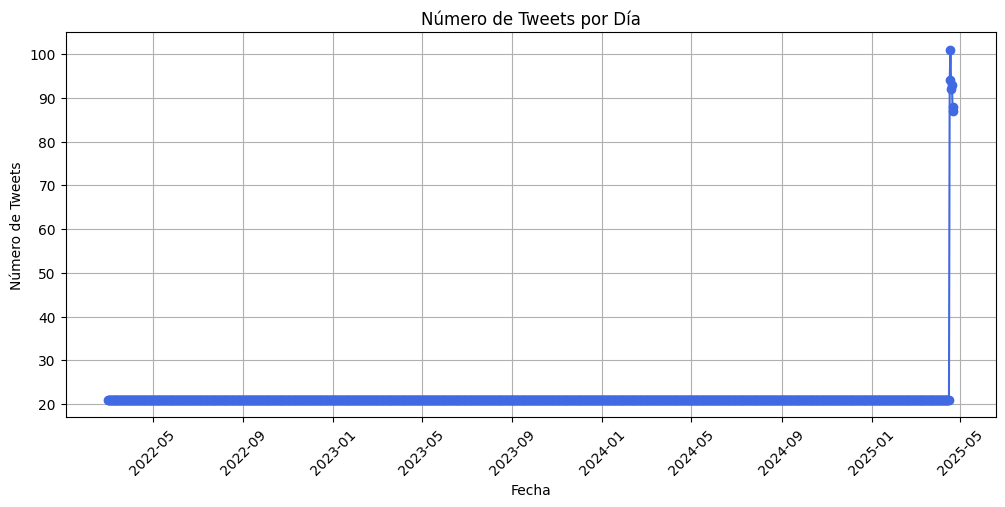

In [6]:
df["createdAt"] = pd.to_datetime(df["createdAt"])
tweets_per_day = df["createdAt"].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 5))
tweets_per_day.plot(kind="line", marker="o", color="royalblue")
plt.xlabel("Fecha")
plt.ylabel("Número de Tweets")
plt.title("Número de Tweets por Día")
plt.xticks(rotation=45)
plt.grid()
plt.show()

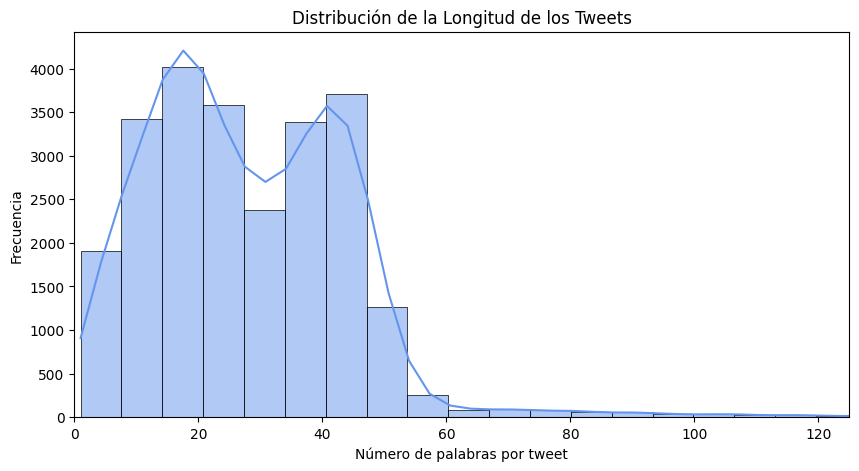

In [10]:
df["tweet_length"] = df["text"].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df["tweet_length"], bins=100, kde=True, color="cornflowerblue")
plt.xlim(0, 125)
plt.xlabel("Número de palabras por tweet")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Longitud de los Tweets")
plt.show()

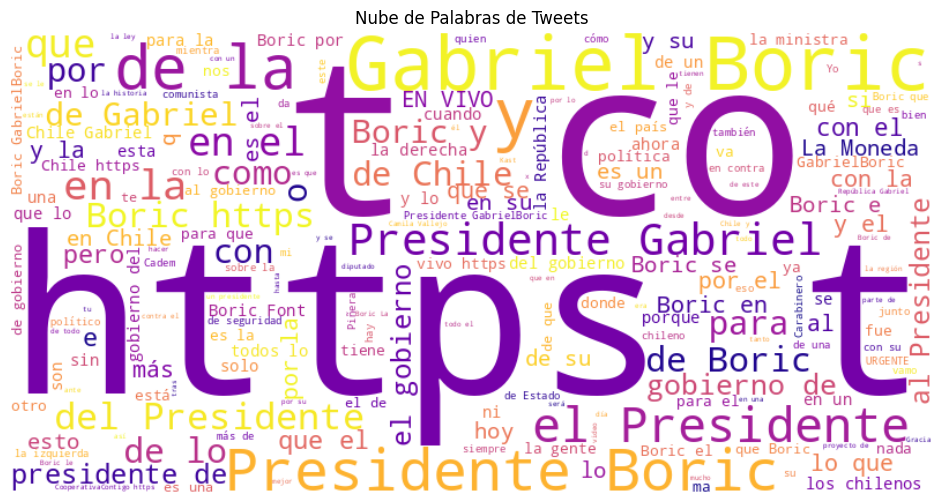

In [7]:
text = " ".join(df["text"].dropna())
text[:500]
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='plasma', max_words=200).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de Tweets")
plt.show()

In [8]:
df = pd.read_csv('../data/preprocessed.csv')

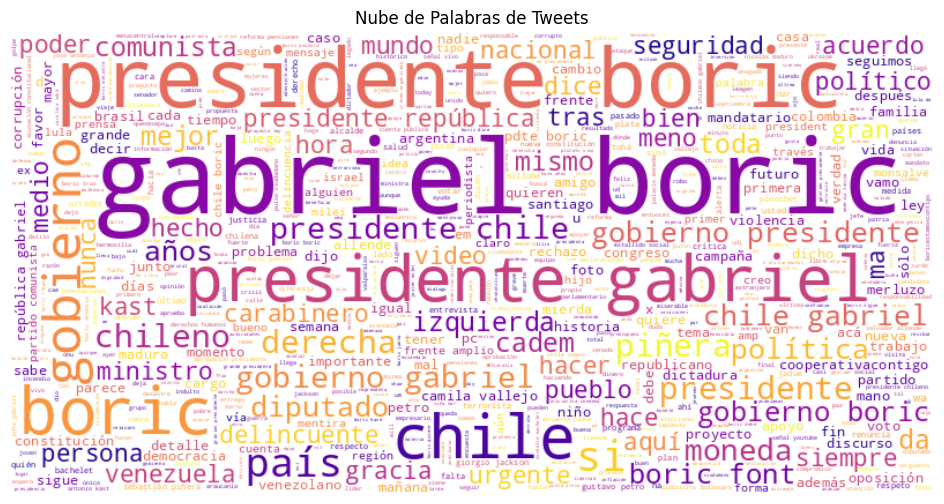

In [14]:
text = " ".join(df["text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='plasma', max_words=1500000).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de Tweets")
plt.show()

In [23]:
df = df.dropna()
df.head()

,date,score_positive,score_negative,score_neutral,retweetCount,replyCount,likeCount,quoteCount,robertuito_0,robertuito_1,...,score_positive_lag_6,score_negative_lag_6,score_neutral_lag_6,score_positive_lag_7,score_negative_lag_7,score_neutral_lag_7,score_negative_rolling7,score_negative_rolling3,sentiment_net,sentiment_net_rolling7
11,2022-03-21,0.358458,0.196829,0.444713,149.000000,388.000000,526.750000,126.000000,0.135075,0.444441,...,0.025492,0.825355,0.149153,0.064808,0.581465,0.353727,0.484069,0.572186,0.161628,-0.332484
12,2022-03-22,0.184142,0.432754,0.383104,224.500000,164.000000,1137.333333,26.833333,0.386215,0.442125,...,0.109561,0.500938,0.389501,0.025492,0.825355,0.149153,0.427984,0.427765,-0.248612,-0.253734
13,2022-03-23,0.129118,0.451518,0.419365,63.907895,94.697368,726.697368,11.736842,0.162557,0.670268,...,0.243527,0.092264,0.664210,0.109561,0.500938,0.389501,0.420924,0.360367,-0.322400,-0.243880
14,2022-03-24,0.129118,0.451518,0.419365,63.907895,94.697368,726.697368,11.736842,0.162557,0.670268,...,0.286385,0.253372,0.460243,0.243527,0.092264,0.664210,0.472246,0.445263,-0.322400,-0.311546
15,2022-03-25,0.178047,0.500652,0.321301,193.000000,378.000000,577.500000,61.500000,0.157430,0.549981,...,0.012535,0.866016,0.121449,0.286385,0.253372,0.460243,0.507571,0.467896,-0.322605,-0.362349


In [24]:
def clasificar_sentimiento(row):
    scores = {
        "positivo": row["score_positive"],
        "negativo": row["score_negative"],
        "neutro": row["score_neutral"]
    }
    max_score = max(scores.values())
    
        # Manejo de empates: si hay más de un score con el mismo valor máximo
    candidatos = [k for k, v in scores.items() if v == max_score]
    if len(candidatos) > 1:
        return "neutro"  # asignamos neutro en caso de empate
    return candidatos[0]

In [25]:
df["sentimiento_clasificado"] = df.apply(clasificar_sentimiento, axis=1)

In [27]:
df.head()

,date,score_positive,score_negative,score_neutral,retweetCount,replyCount,likeCount,quoteCount,robertuito_0,robertuito_1,...,score_negative_lag_6,score_neutral_lag_6,score_positive_lag_7,score_negative_lag_7,score_neutral_lag_7,score_negative_rolling7,score_negative_rolling3,sentiment_net,sentiment_net_rolling7,sentimiento_clasificado
11,2022-03-21,0.358458,0.196829,0.444713,149.000000,388.000000,526.750000,126.000000,0.135075,0.444441,...,0.825355,0.149153,0.064808,0.581465,0.353727,0.484069,0.572186,0.161628,-0.332484,neutro
12,2022-03-22,0.184142,0.432754,0.383104,224.500000,164.000000,1137.333333,26.833333,0.386215,0.442125,...,0.500938,0.389501,0.025492,0.825355,0.149153,0.427984,0.427765,-0.248612,-0.253734,negativo
13,2022-03-23,0.129118,0.451518,0.419365,63.907895,94.697368,726.697368,11.736842,0.162557,0.670268,...,0.092264,0.664210,0.109561,0.500938,0.389501,0.420924,0.360367,-0.322400,-0.243880,negativo
14,2022-03-24,0.129118,0.451518,0.419365,63.907895,94.697368,726.697368,11.736842,0.162557,0.670268,...,0.253372,0.460243,0.243527,0.092264,0.664210,0.472246,0.445263,-0.322400,-0.311546,negativo
15,2022-03-25,0.178047,0.500652,0.321301,193.000000,378.000000,577.500000,61.500000,0.157430,0.549981,...,0.866016,0.121449,0.286385,0.253372,0.460243,0.507571,0.467896,-0.322605,-0.362349,negativo


In [34]:
total_por_dia = df.groupby('date')['sentimiento_clasificado'].count().reset_index(name='total')

In [35]:
total_por_dia.head()

,date,total
0,2022-03-21,1
1,2022-03-22,1
2,2022-03-23,1
3,2022-03-24,1
4,2022-03-25,1


In [20]:
df_encuestas = pd.read_csv('../data/encuestas.csv')

In [21]:
df_encuestas

,date,aprobacion_boric,desaprobacion_boric
0,2022-03-18,0.50,0.20
1,2022-03-25,0.50,0.30
2,2022-04-01,0.45,0.35
3,2022-04-08,0.44,0.41
4,2022-04-15,0.40,0.50
...,...,...,...
156,2025-03-14 00:00:00,0.28,0.67
157,2025-03-21 00:00:00,0.32,0.62
158,2025-03-28 00:00:00,0.28,0.65
159,2025-04-04 00:00:00,0.31,0.66
